#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import flights table
flights = pd.read_csv('flights.csv', low_memory=False)
flights.shape

(15927485, 42)

In [102]:
# select 10000 random rows to use for testing 
flights_sample = flights.sample(n=100000)

In [103]:
flights_sample = flights_sample[(flights_sample['dep_delay'].isna() != True)] 
flights_sample = flights_sample[(flights_sample['dep_delay'] < 500)] 
flights_sample = flights_sample[(flights_sample['diverted']!=1) | (flights_sample['cancelled']!=1)]
flights_sample = flights_sample[(flights_sample['arr_delay'].isna() != True)] 


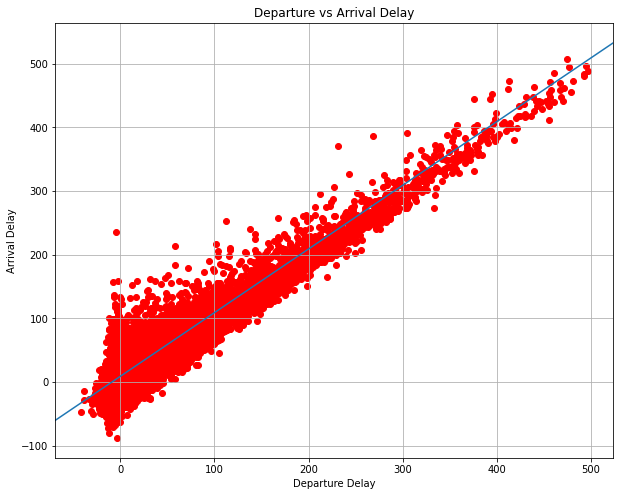

In [104]:
# plot dep_delay vs arr_delay long with slope=1 line for comparision

x = flights_sample['dep_delay']
y = flights_sample['arr_delay']
fig, ax = plt.subplots(figsize=[10,8])
ax.scatter(x, y, color='r')

# need a slope and c to fix the position of line
slope = 1
c = -60

x_min, x_max = ax.get_xlim()
y_min, y_max = c, c + slope*(x_max-x_min)
plt.grid()
ax.plot([x_min, x_max], [y_min, y_max])
ax.set_xlim([x_min, x_max])
ax.set_title('Departure vs Arrival Delay')
ax.set_xlabel('Departure Delay')
ax.set_ylabel('Arrival Delay')
plt.savefig('dep_delay_vs_arrival.png')

#### The graph shows that for all points above the line, the delay was reduced while in transit

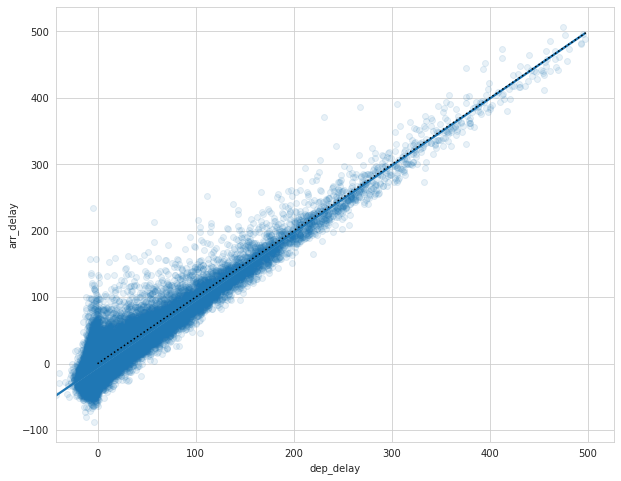

In [125]:
plt.figure(figsize=(10,8))
with sns.axes_style('whitegrid'):
    g = sns.regplot("dep_delay", "arr_delay", flights_sample, scatter_kws={'alpha':0.1})
    g.plot(np.linspace(0, 500),
            np.linspace(0, 500), ':k')
plt.savefig('dep_delay_vs_arrival.png')

In [86]:
flights_sample['arrival_vs_delay'] = flights_sample['dep_delay']

In [87]:
flights_sample['arr_vs_del'] = flights_sample['arrival_vs_delay'].apply(lambda x: 1 if x >= 0 else 0)

In [88]:
# all flights where arrival delay was reduced in transit
reduced_delay = flights_sample[(flights_sample['dep_delay'] > 0) & (flights_sample['arrival_vs_delay'] > 0)].shape[0]/flights_sample[(flights_sample['dep_delay'] > 0)].shape[0]
increased_delay = flights_sample[(flights_sample['dep_delay'] > 0) & (flights_sample['arrival_vs_delay'] < 0)].shape[0]/flights_sample[(flights_sample['dep_delay'] > 0)].shape[0]
still_late = flights_sample[(flights_sample['dep_delay'] > 0) & (flights_sample['arr_delay'] > 0)].shape[0]/flights_sample[(flights_sample['dep_delay'] > 0)].shape[0]

ll_al = flights_sample[(flights_sample['dep_delay'] > 0) & (flights_sample['arr_delay'] > 0)].shape[0]/flights_sample.shape[0]
ll_ae = flights_sample[(flights_sample['dep_delay'] > 0) & (flights_sample['arr_delay'] <= 0)].shape[0]/flights_sample.shape[0]
le_al = flights_sample[(flights_sample['dep_delay'] <= 0) & (flights_sample['arr_delay'] > 0)].shape[0]/flights_sample.shape[0]
le_ae = flights_sample[(flights_sample['dep_delay'] <= 0) & (flights_sample['arr_delay'] <= 0)].shape[0]/flights_sample.shape[0]

print("Flights that leave late and arrive late:", round(ll_al,2))
print("Flights that leave late and arrive early:",round(ll_ae,2))
print("Flights that leave early and arrive late:",round(le_al,2))
print("Flights that leave early and arrive early:",round(le_ae,2))

print("\nFraction of flights that can reduce arrival delay after departing late:",round(reduced_delay,2))
print("Fraction of flights that arrive late having left late:",round(still_late,2))



Flights that leave late and arrive late: 0.24
Flights that leave late and arrive early: 0.09
Flights that leave early and arrive late: 0.11
Flights that leave early and arrive early: 0.56

Fraction of flights that can reduce arrival delay after departing late: 0.71
Fraction of flights that arrive late having left late: 0.73


(359, 44)